### Mall Customers clustering use case

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action='ignore') 
%matplotlib inline

In [34]:
mall=pd.read_csv('Mall_Customers.csv')

In [36]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
mall['CustomerID']

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [46]:
mall['Spending Score (1-100)'][5:20]

5     76
6      6
7     94
8      3
9     72
10    14
11    99
12    15
13    77
14    13
15    79
16    35
17    66
18    29
19    98
Name: Spending Score (1-100), dtype: int64

In [48]:
new_mall=mall.iloc[:,[3,4]].values

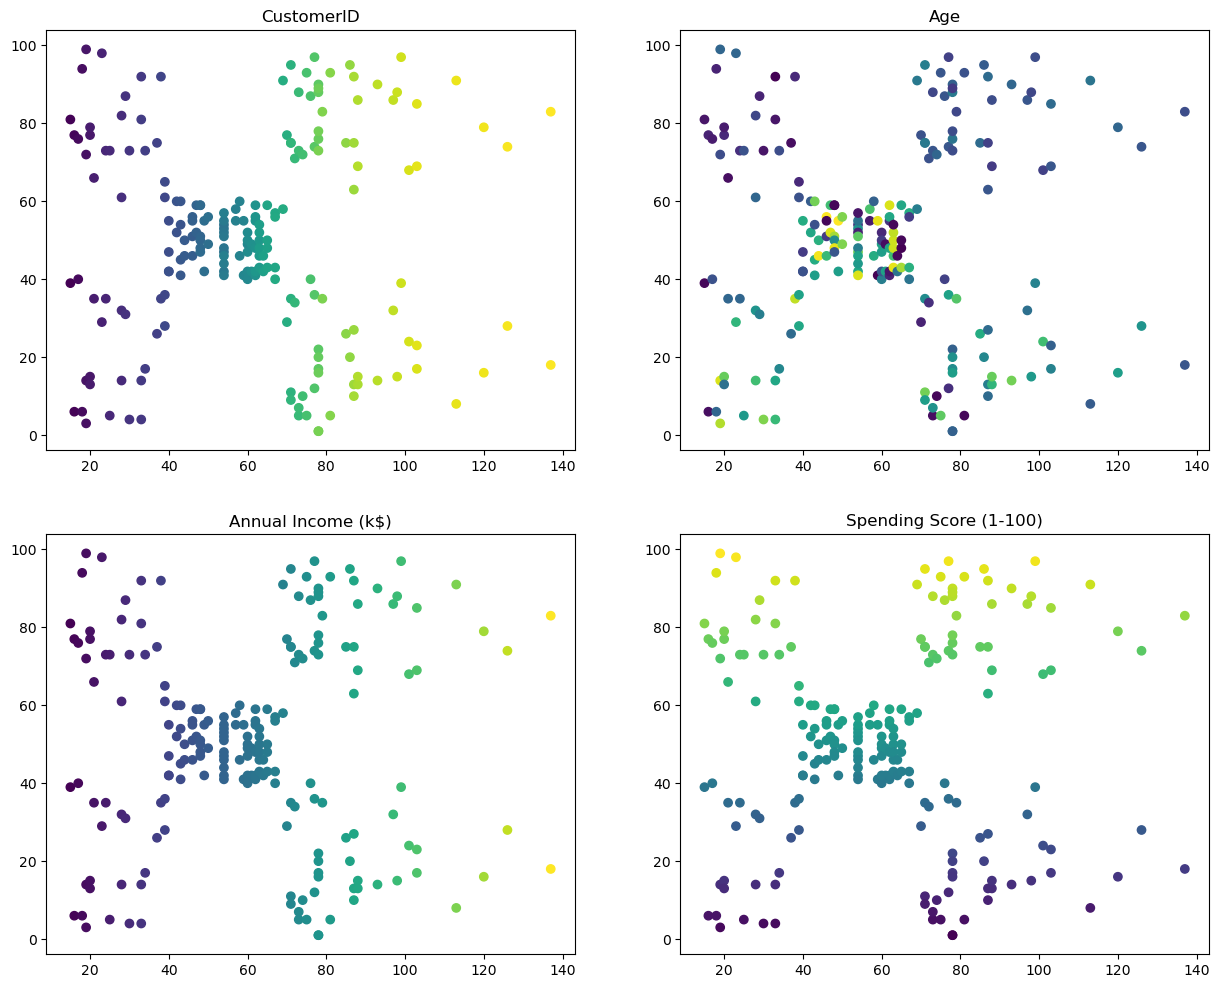

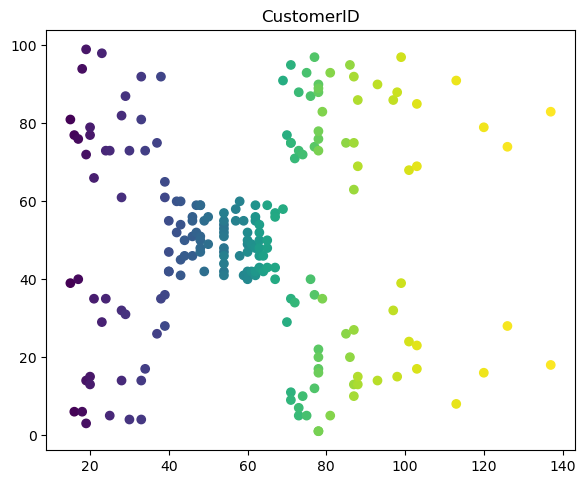

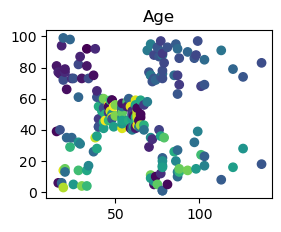

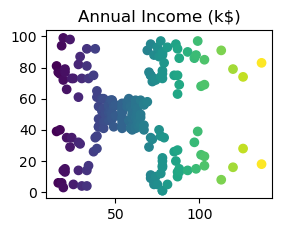

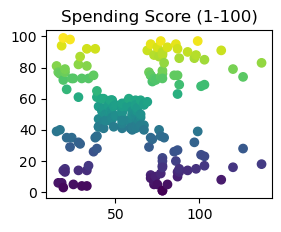

In [80]:
plt.figure(figsize=(15,12))
t=1
for i in mall.columns:
    if(mall[i].dtype=='int64'):
        y=i
        plt.subplot(2,2,t)
        plt.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],c=mall[i])
        plt.title(i)
        plt.show()
        t=t+1

In [84]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()
y=le.fit_transform(mall['Gender'])

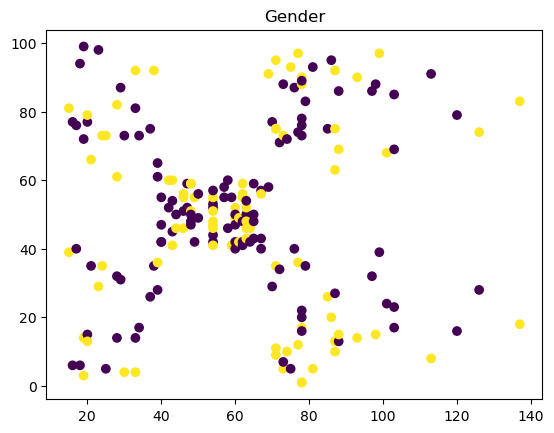

In [88]:
plt.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],c=y)
plt.title('Gender')
plt.show()

### Elbow Method

In [91]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(new_mall)
    wcss.append(kmeans.inertia_)

In [93]:
wcss

[269981.28,
 184609.98434090614,
 132485.3805668016,
 73679.78903948834,
 44448.45544793371,
 38858.95997514391,
 32277.089657401422,
 25095.703209997544,
 22910.223123417465,
 20605.028249194416]

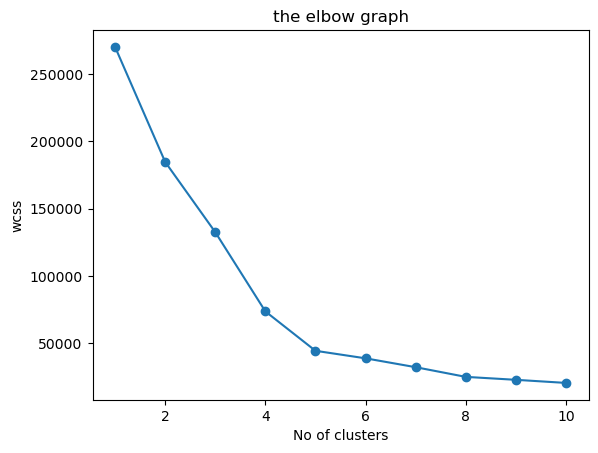

In [95]:
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss)
plt.title('the elbow graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()